In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


[-4.08388516  1.98090531]
[-0.02868372  3.79387618]
(1000, 2)


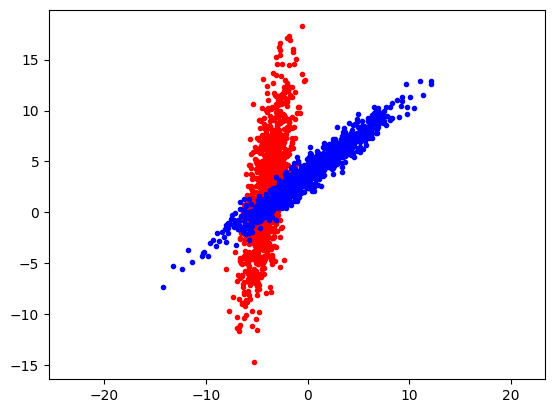

In [3]:
# Set the mean and covariance matrix
mu1 = np.random.rand(2)*10 - 5
mu2 = np.random.rand(2)*10 - 5
cov1 = np.random.rand(2, 2) * 10 - 5
cov2 = np.random.rand(2, 2) * 10 - 5

#make sure COV is psd
cov1 = np.dot(cov1, cov1.T)
cov2 = np.dot(cov2, cov2.T)

print(mu1)
print(mu2)

# Generate samples from a multivariate Gaussian distribution
x1 = np.random.multivariate_normal(mu1, cov1, size=1000)
x2 = np.random.multivariate_normal(mu2, cov2, size=1000)
print(x1.shape) 
plt.plot(x1[:,0], x1[:,1], 'r.')
plt.plot(x2[:,0], x2[:,1], 'b.')
plt.axis('equal')
plt.show()

In [4]:
x = np.vstack([x1, x2])
print(x.shape)

# Assuming you have a numpy array 'x' with shape (n_samples, n_features)
# Create an instance of GaussianMixture with 2 components
gmm = GaussianMixture(n_components=2)

# Fit the GMM to the data
gmm.fit(x)

# Get the predicted labels for each sample
labels = gmm.predict(x)

# Get the probabilities of each sample belonging to each component
probs = gmm.predict_proba(x)

# Get the means and covariances of each component
means = gmm.means_
covariances = gmm.covariances_

(2000, 2)


In [5]:
print(probs)

[[5.34895073e-01 4.65104927e-01]
 [5.73834952e-01 4.26165048e-01]
 [1.25049537e-01 8.74950463e-01]
 ...
 [9.99666795e-01 3.33204794e-04]
 [1.00000000e+00 1.33049316e-12]
 [9.99957061e-01 4.29388253e-05]]


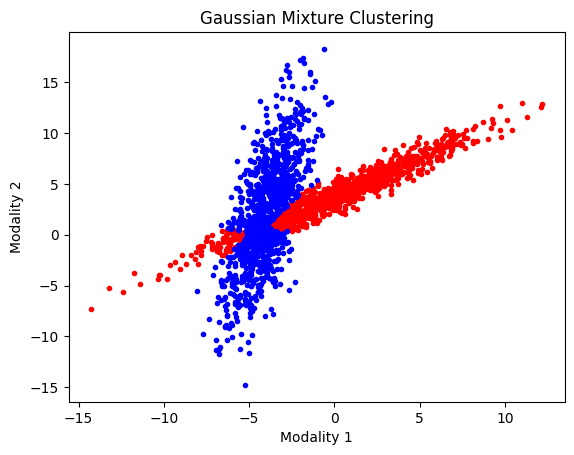

In [6]:

# Create a scatter plot of the data points
# plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='RdYlBu')#, cmap='viridis')
# # Add colorbar
# plt.colorbar()

x_class1 = x[labels == 0]
x_class2 = x[labels == 1]

plt.plot(x_class1[:,0], x_class1[:,1], 'r.', label='Class 1')
plt.plot(x_class2[:,0], x_class2[:,1], 'b.', label='Class 2') 



# Set labels and title
plt.xlabel('Modality 1')
plt.ylabel('Modality 2')
plt.title('Gaussian Mixture Clustering')

# Show the plot
plt.show()

In [7]:
print(x.shape)
print(labels.shape)

print(x_class1.shape)

(2000, 2)
(2000,)
(954, 2)


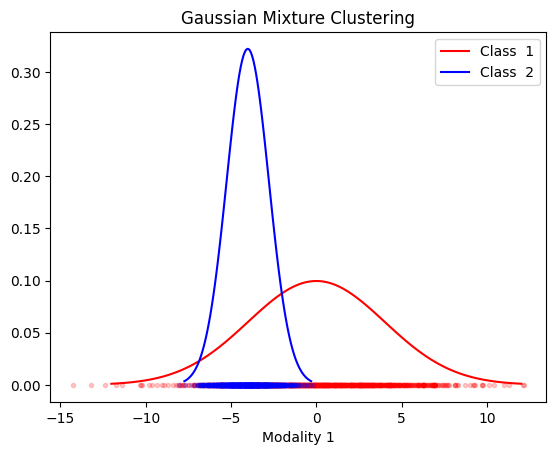

In [8]:
# Project the data onto one modality and then plot
plt.plot(x_class1[:, 0], np.zeros(x_class1.shape[0]),'.', color='red', alpha=0.2)
plt.plot(x_class2[:, 0], np.zeros(x_class2.shape[0]),'.', color='blue', alpha = .2)
plt.xlabel('Modality 1')
plt.title('Gaussian Mixture Clustering')

# Also on the same plot plot the bell curve for each component
for i in range(2):
    mu = means[i, 0]
    sigma = np.sqrt(covariances[i, 0, 0])
    x_axis = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x_axis, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_axis - mu) / sigma) ** 2), label='Class  ' + str(i+1), color = 'blue' if i == 1 else 'red')
plt.legend()

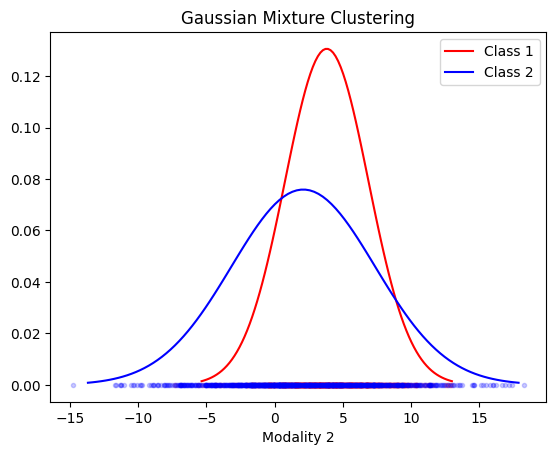

In [9]:
# Project the data onto the second modality and then plot
plt.plot(x_class1[:, 1], np.zeros(x_class1.shape[0]),'.', color='red', alpha=0.2)
plt.plot(x_class2[:, 1], np.zeros(x_class2.shape[0]),'.', color='blue', alpha = .2)
plt.xlabel('Modality 2')
plt.title('Gaussian Mixture Clustering')

# Also on the same plot plot the bell curve for each component
for i in range(2):
    mu = means[i, 1]
    sigma = np.sqrt(covariances[i, 1, 1])
    x_axis = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x_axis, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_axis - mu) / sigma) ** 2), label='Class ' + str(i+1), color = 'blue' if i == 1 else 'red')

plt.legend()

In [10]:
def prob_k(x, k, means, covariances):
    # Calculate the probability of x belonging to class k, given the means and covariances
    mu = means[k]
    cov = covariances[k]
    return 1/(np.sqrt(np.linalg.det(2*np.pi*cov))) * np.exp(-0.5 * np.dot(np.dot((x - mu).T, np.linalg.inv(cov)), (x - mu)))
def prob_m_k(x, m, k, means, covariances):
    # Calculate the probability of x belonging to class k, given just one modality m and the means and covariances
    mu = means[k, m]
    var = covariances[k, m, m]
    return 1/(np.sqrt(2*np.pi*var)) * np.exp(-0.5 * ((x - mu)**2)/var)


In [15]:
# Assume we draw a new sample from the distributioni and want to classify it
new_sample = np.random.multivariate_normal(mu1, cov1)

# Get the probability of the new sample belonging to each component
prob = gmm.predict_proba([new_sample])
print("Using sklearn:")
print(prob)

print("Using the sklearn means to calculate p(x|mu,sigma):")
p1 = prob_k(new_sample, 0, means, covariances)
p2 = prob_k(new_sample, 1, means, covariances)
print(p1/(p1+p2), p2/(p1+p2))

Using sklearn:
[[0.46324791 0.53675209]]
Using the sklearn means to calculate p(x|mu,sigma):
0.4733627520705383 0.5266372479294618


In [16]:
# Now assume we only have one modality
# new_sample = np.random.multivariate_normal(mu1, cov1)

p1 = prob_m_k(new_sample[0], 0, 0, means, covariances)
p2 = prob_m_k(new_sample[0], 0, 1, means, covariances)
print("Using only modality one:")
print(p1/(p1+p2), p2/(p1+p2))

print("Using only modality two:")
p1 = prob_m_k(new_sample[1], 1, 0, means, covariances)
p2 = prob_m_k(new_sample[1], 1, 1, means, covariances)
print(p1/(p1+p2), p2/(p1+p2))


Using only modality one:
0.1512078855004133 0.8487921144995867
Using only modality two:
0.5075462187524529 0.4924537812475472


In [14]:
#Now if i take a bunch of random samples, and classify them with only one modality at a time
# can we observe which modality is more informative?
n_samples = 1000
test = []
for i in range(n_samples):
    #ik this looks weird but i think gmm.predict assumes mu1 is second class
    if np.random.rand() < 0.5:
        test.append([*np.random.multivariate_normal(mu1, cov1), 1])
    else:
        test.append([*np.random.multivariate_normal(mu2, cov2), 0])


test = np.array(test)

modality1 = []
modality2 = []
for i in test:
    p1 = prob_m_k(i[0], 0, 0, means, covariances)
    p2 = prob_m_k(i[0], 0, 1, means, covariances)
    modality1.append([p1/(p1+p2), p2/(p1+p2)])
    p1 = prob_m_k(i[1], 1, 0, means, covariances)
    p2 = prob_m_k(i[1], 1, 1, means, covariances)
    modality2.append([p1/(p1+p2), p2/(p1+p2)])

# Convert probabilities to class labels
modality1_labels = np.argmax(modality1, axis=1)
modality2_labels = np.argmax(modality2, axis=1)

# Calculate accuracies
acc1 = np.sum(modality1_labels == test[:,2]) / n_samples
acc2 = np.sum(modality2_labels == test[:,2]) / n_samples
print("Accuracy of modality 1: ", acc1)
print("Accuracy of modality 2: ", acc2)
# modality1 = np.zeros(n_samples)
# modality2 = np.zeros(n_samples)
# for i in range(n_samples):
#     new_sample = np.random.multivariate_normal(mu1, cov1)
#     p1 = prob_m_k(new_sample[0], 0, 0, means, covariances)
#     p2 = prob_m_k(new_sample[0], 0, 1, means, covariances)
#     modality1[i] = p1/(p1+p2)
#     p1 = prob_m_k(new_sample[1], 1, 0, means, covariances)
#     p2 = prob_m_k(new_sample[1], 1, 1, means, covariances)
#     modality2[i] = p1/(p1+p2)

# plt.plot(modality1, modality2, '.')
# plt.axis('equal')
# plt.xlabel('Modality 1')
# plt.ylabel('Modality 2')
# plt.title('Modality comparison')
# plt.show()

Accuracy of modality 1:  0.822
Accuracy of modality 2:  0.652


Overall it seems that both modalities are about the same in terms of predicting the correct cluster... Now let's try to do the same, but train with less of one modality versus the other, and then attempt to see if the modality that was trained with more data can predict better.

In order to do this, we need to reimplement the EM algorithm.
This algorithm should now be able to somehow paritally update the joint model when only one modality is present.

In [45]:
# Run the EM algorithm
def expectation_step(x, means, covs, pis):
    n = x.shape[0]
    k = means.shape[0]
    r = np.zeros((n, k)) # responsibilities, rik is the prob the ith point is in the kth gaussian

    for i in range(n):
        for j in range(k):
            r[i, j] = pis[j] * prob_k(x[i], j, means, covs)
        r[i] /= np.sum(r[i])
    return r


def initialize_parameters(k, d, x):
    # Initialize means randomly
    means = np.random.randn(k, d)
    
    # Initialize covariances as identity matrices
    covariances = np.zeros((k, d, d))
    # print(x)
    # cov = np.cov(x.T)
    # print(cov)
    for i in range(k):
        v = np.random.rand(d)
        covariances[i] =  np.outer(v, v)
    
    # Initialize mixing coefficients uniformly
    mixing_coeffs = np.ones(k) / k
    
    return means, covariances, mixing_coeffs


def compute_gaussian(x, mean, covariance):
    print("In gaussian")
    print(covariance)
    d = x.shape[0]
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(covariance)), (x - mean))
    coefficient = 1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(covariance))
    return coefficient * np.exp(exponent)

def expectation_step(x, means, covariances, mixing_coeffs):
    n = x.shape[1]
    k = means.shape[0]
    responsibilities = np.zeros((n, k))
    
    for i in range(n):
        for j in range(k):
            responsibilities[i, j] = mixing_coeffs[j] * compute_gaussian(x[:, i], means[j], covariances[j])
        responsibilities[i] /= np.sum(responsibilities[i])
    
    return responsibilities

def maximization_step(x, responsibilities):
    n = x.shape[1]
    k = responsibilities.shape[1]
    d = x.shape[0]
    
    means = np.zeros((k, d))
    covariances = np.zeros((k, d, d))
    mixing_coeffs = np.zeros(k)
    
    chosen_ks = np.argmax(responsibilities, axis=1) #i demensional matrix with the index of the highest probability for each point
    Nks = [np.sum(chosen_ks == i) for i in range(k)]
    for j in range(k):
        for i in range(n):
            means[j] += responsibilities[i, j] * x[:, i]
        # means[j] /= np.sum(responsibilities[:, j])
        
        for i in range(n):
            covariances[j] += responsibilities[i, j] * np.outer(x[:, i] - means[j], x[:, i] - means[j])
        # covariances[j] /= np.sum(responsibilities[:, j])

        # Add regularization
        covariances[j] += np.eye(d) * 1e-6
        
        means[j] /= Nks[j]
        covariances[j] /= Nks[j]
        mixing_coeffs[j] = np.mean(responsibilities[:, j])

    return means, covariances, mixing_coeffs

def compute_log_likelihood(x, means, covariances, mixing_coeffs):
    n = x.shape[1]
    k = means.shape[0]
    log_likelihood = 0
    
    for i in range(n):
        likelihood = 0
        for j in range(k):
            likelihood += mixing_coeffs[j] * compute_gaussian(x[:, i], means[j], covariances[j])
        log_likelihood += np.log(likelihood)
    
    return log_likelihood

def gmm_em(x, k, max_iterations=100, tolerance=1e-6):
    d = x.shape[0]
    means, covariances, mixing_coeffs = initialize_parameters(k, d, x)
    
    prev_log_likelihood = -np.inf
    
    for iteration in range(max_iterations):
        print(iteration)
        responsibilities = expectation_step(x, means, covariances, mixing_coeffs)
        means, covariances, mixing_coeffs = maximization_step(x, responsibilities)
        
        log_likelihood = compute_log_likelihood(x, means, covariances, mixing_coeffs)
        if np.abs(log_likelihood - prev_log_likelihood) < tolerance:
            break
        
        prev_log_likelihood = log_likelihood
    
    return means, covariances, mixing_coeffs

# Example usage:
x = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6]])
k = 2
means, covariances, mixing_coeffs = gmm_em(x, k)
print("Means:")
print(means)
print("Covariances:")
print(covariances)
print("Mixing Coefficients:")
print(mixing_coeffs)

0
In gaussian
[[0.98017502 0.79632842]
 [0.79632842 0.64696502]]
In gaussian
[[0.01241444 0.0019099 ]
 [0.0019099  0.00029383]]


C:\Users\abhik\AppData\Local\Temp\ipykernel_7072\1435213835.py:38: RuntimeWarning: invalid value encountered in sqrt
  coefficient = 1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(covariance))
C:\Users\abhik\AppData\Local\Temp\ipykernel_7072\1435213835.py:39: RuntimeWarning: overflow encountered in exp
  return coefficient * np.exp(exponent)


LinAlgError: Singular matrix

In [ ]:


# # Initialize log likelihood
# log_likelihood = 0
# log_likelihoods = []

# # Run the EM algorithm
# def expectation_step(x, means, covs, pis):
#     n = x.shape[0]
#     k = means.shape[0]
#     r = np.zeros((n, k)) # responsibilities, rik is the prob the ith point is in the kth gaussian

#     for i in range(n):
#         for j in range(k):
#             r[i, j] = pis[j] * prob_k(x[i], j, means, covs)
#         r[i] /= np.sum(r[i])
#     return r

# def maximization_step(x, r):
#     n = x.shape[0]
#     k = r.shape[1]
#     d = x.shape[1]

#     means = np.zeros((k, d))
#     covs = np.zeros((k, d, d))
#     pis = np.zeros(k)

#     for j in range(k):
#         for i in range(n):
#             means[j] += r[i, j] * x[i]
#         means[j] /= np.sum(r[:, j])

#         for i in range(n):
#             covs[j] += r[i, j] * np.outer(x[i] - means[j], x[i] - means[j])
#         covs[j] /= np.sum(r[:, j])

#         pis[j] = np.mean(r[:, j])

#     return means, covs, pis

# def initialize_parameters(k, d):
#     # Initialize means randomly
#     means = np.random.randn(k, d)
    
#     # Initialize covariances as identity matrices
#     covariances = np.zeros((k, d, d))
#     for i in range(k):
#         m = np.random.rand(d,d)
#         covariances[i] = np.dot(m, m.T)
    
#     # Initialize mixing coefficients uniformly
#     mixing_coeffs = np.ones(k) / k
    
#     return means, covariances, mixing_coeffs

# def compute_log_likelihood(x, means, covariances, mixing_coeffs):
#     n = x.shape[1]
#     k = means.shape[0]
#     log_likelihood = 0
    
#     for i in range(n):
#         likelihood = 0
#         for j in range(k):
#             likelihood += mixing_coeffs[j] * prob_k(x[:, i], means[j], covariances[j])
#         log_likelihood += np.log(likelihood)
    
#     return log_likelihood

# def gmm_em(x, k, max_iterations=100, tolerance=1e-6):
#     d = x.shape[0]
#     means, covariances, mixing_coeffs = initialize_parameters(k, d)
    
#     prev_log_likelihood = -np.inf
    
#     for iteration in range(max_iterations):
#         responsibilities = expectation_step(x, means, covariances, mixing_coeffs)
#         means, covariances, mixing_coeffs = maximization_step(x, responsibilities)
        
#         log_likelihood = compute_log_likelihood(x, means, covariances, mixing_coeffs)
#         if np.abs(log_likelihood - prev_log_likelihood) < tolerance:
#             break
        
#         prev_log_likelihood = log_likelihood
    
#     return means, covariances, mixing_coeffs

# # Example usage:
# x = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6]])
# k = 2
# means, covariances, mixing_coeffs = gmm_em(x, k)
# print("Means:")
# print(means)
# print("Covariances:")
# print(covariances)
# print("Mixing Coefficients:")
# print(mixing_coeffs)